<a href="https://colab.research.google.com/github/georgezefko/car-part-segmentation/blob/main/Read_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [86]:
#import libraries

from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import glob
import cv2

In [11]:
#define the paths
five_doors = "/content/drive/My Drive/Deloitte data/carseg_data/5doors"
landscape = "/content/drive/My Drive/Deloitte data/carseg_data/landscape"
opel = "/content/drive/My Drive/Deloitte data/carseg_data/opel"
orientation_1 = "/content/drive/My Drive/Deloitte data/carseg_data/Orientation 1_train"
orientation_2 = "/content/drive/My Drive/Deloitte data/carseg_data/Orientation 2_train"
orientation_3 = "/content/drive/My Drive/Deloitte data/carseg_data/Orientation 3_train"
orientation_4 = "/content/drive/My Drive/Deloitte data/carseg_data/Orientation 4_train"

#define the images roots
img_five_doors=glob.glob(str(five_doors)+'/*.png')
img_or_1 = glob.glob(str(orientation_1)+"/*.jpg")
img_or_2 = glob.glob(str(orientation_2)+"/*.jpg")
img_or_3 = glob.glob(str(orientation_3)+"/*.jpg")
img_or_4 = glob.glob(str(orientation_4)+"/*.jpg")
img_opel = glob.glob(str(opel)+"/*.png")
img_landscape = glob.glob(str(landscape)+"/*.jpg")



In [16]:
print('The images in orinentation 1 are:', len(img_or_1))
print('The images in orinentation 2 are:', len(img_or_2))
print('The images in orinentation 3 are:', len(img_or_3))
print('The images in orinentation 4 are:', len(img_or_4))
print('The total is', len(img_or_1)+len(img_or_2)+len(img_or_3)+len(img_or_4))

The images in orinentation 1 are: 338
The images in orinentation 2 are: 185
The images in orinentation 3 are: 122
The images in orinentation 4 are: 363
The total is 1008


In [4]:

def image(img):
  #function that prints the images
    plt.figure(figsize=(25,20))
    for i in range(50):
      image = mpimg.imread(img[i])
      plt.subplot(10,5,i+1)
      plt.imshow(image)
      plt.axis('off')

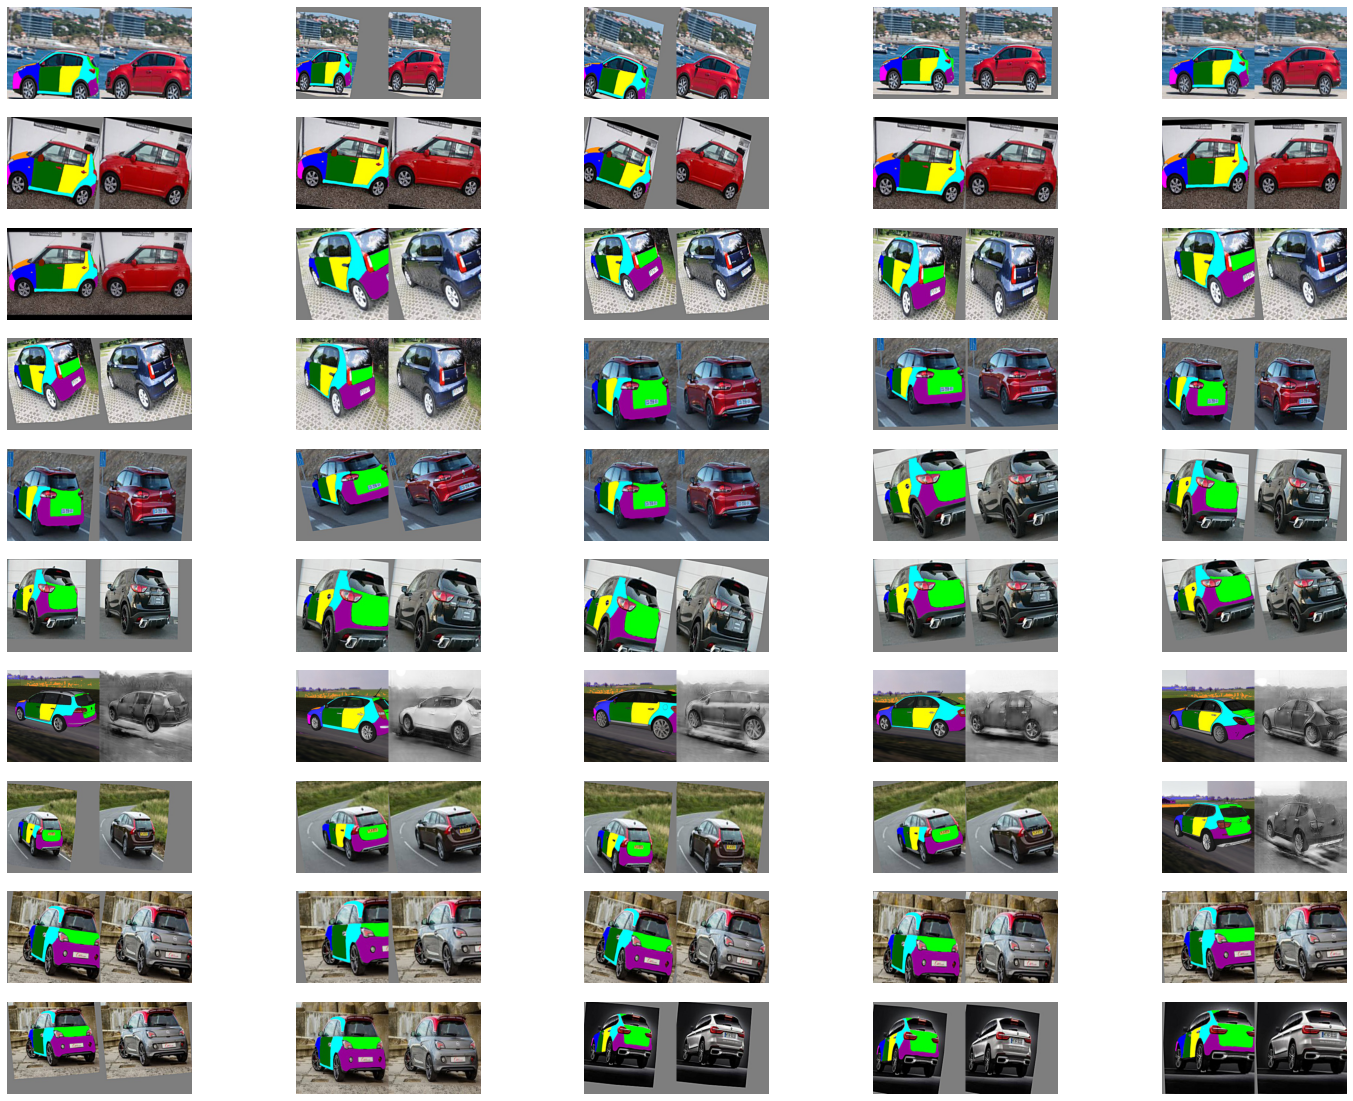

In [13]:
image(img_or_2)


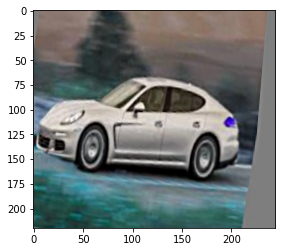

In [87]:
#crop photos


image = cv2.imread(img_or_1[1])
cropped = image[30:250,255:500]
plt.imshow(cropped)

In [62]:
crop(img_or_1)

TypeError: ignored

In [38]:
def imCrop(x):
    height,width,depth = x.shape
    return [x[height , :width//2] , x[height, width//2:]]

In [43]:
transform_pipe = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(), # Convert np array to PILImage
    
    torchvision.transforms.RandomRotation(90),

    torchvision.transforms.RandomCrop(size=(256, 256)),
    
    torchvision.transforms.RandomHorizontalFlip(0.5),
    
    torchvision.transforms.RandomVerticalFlip(0.5),
    
    torchvision.transforms.ToTensor()
])


